# 🧠 Lab 2.1: Understanding CNN Layers with VGG16
**Module 3: Computer Vision and Image Processing**  
B-Tech AI Specialization | Chitkara University | February 2026

---

## 🏥 Industry Scenario

> A hospital deployed a chest X-ray classifier, but doctors don't trust it — they can't see *what* the model is "looking at" when it makes decisions. Your job is to **visualize the internal layers of the CNN** to make it interpretable and trustworthy.

## 🎯 Objective
Load a pre-trained VGG16 model, extract feature maps from 3 different layers, and **explore** what the network learns at each depth using interactive tools.

**Time:** 90 minutes | **Mode:** Individual

---

### 📋 Lab Flow
Each task follows this structure:

| Step | What you do |
|---|---|
| 🤔 **Predict** | Answer a quick question *before* coding |
| 💻 **Code** | Fill in the `TODO` cells |
| 💡 **Reveal** | Click a button to check your solution |
| 🎚️ **Explore** | Use sliders/dropdowns to discover patterns |

---

## ⚙️ Setup — Run This First

Run the cell below to install packages and set up the interactive tools. **Don't skip this step.**

In [23]:
# Install & import everything needed
# (ipywidgets is pre-installed on Colab — no pip needed)

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

from PIL import Image
import requests
from io import BytesIO

import ipywidgets as widgets
from IPython.display import display, HTML, Code, clear_output

print(f"TensorFlow : {tf.__version__}")
print(f"ipywidgets : {widgets.__version__}")
print("✅ All set — you're ready to start!")

TensorFlow : 2.19.0
ipywidgets : 7.7.1
✅ All set — you're ready to start!


### 🛠️ Helper — Reveal Button
This sets up the hint/solution buttons used throughout the lab. **Run once, then ignore.**

In [24]:
def reveal_button(hint_text, solution_code):
    """Creates a paired Hint + Solution reveal widget for Colab."""
    out = widgets.Output()

    hint_btn = widgets.Button(
        description='💡 Hint', button_style='info',
        layout=widgets.Layout(width='120px', margin='4px')
    )
    sol_btn = widgets.Button(
        description='✅ Solution', button_style='warning',
        layout=widgets.Layout(width='140px', margin='4px')
    )
    hide_btn = widgets.Button(
        description='🙈 Hide', button_style='',
        layout=widgets.Layout(width='100px', margin='4px')
    )

    def on_hint(b):
        with out:
            out.clear_output(wait=True)
            display(HTML(
                f'<div style="background:#e3f2fd;color: #1565C0; padding:12px;border-radius:6px;'
                f'border-left:4px solid #0D47A1;font-size:14px">'
                f'<b>💡 Hint:</b><br>{hint_text}</div>'
            ))

    def on_sol(b):
        with out:
            out.clear_output(wait=True)
            display(HTML('<b>✅ Solution:</b>'))
            display(Code(solution_code, language='python'))

    def on_hide(b):
        with out:
            out.clear_output()

    hint_btn.on_click(on_hint)
    sol_btn.on_click(on_sol)
    hide_btn.on_click(on_hide)

    row = widgets.HBox([hint_btn, sol_btn, hide_btn])
    display(row, out)

print("reveal_button() is ready ✅")

reveal_button() is ready ✅


---
## Task 1: Load VGG16

### 🤔 Predict First

Before running any code, answer these in the cell below:
1. VGG16 has 16 layers — what do you think those 16 layers consist of?
2. What does "pre-trained on ImageNet" mean? Why does it matter here?
3. If you load the model with `weights=None`, what would the feature maps look like?

In [25]:
# ✏️ Write your predictions here (as comments — no code needed yet)

# 1. The 16 layers are probably...
#    - 13 convolutional layers (with ReLU activation)
#    - 3 fully connected layers (with dropout and softmax output)

# 2. Pre-trained on ImageNet means...
#    - The model was trained on a large dataset of 1000 different object categories
#    - The weights of the model are already optimized for recognizing these categories

# 3. With weights=None, feature maps would look like...
#    - Randomly initialized weights would produce feature maps that are not meaningful
#    - The model would not be able to recognize patterns in the input images effectively

### 💻 Your Turn — Load the Model

Fill in the `TODO` below. You need:
- `weights='imagenet'` — use pre-trained weights
- `include_top=True` — include the classifier layers
- `input_shape=(224, 224, 3)` — VGG16's required input size

In [26]:
# TODO: Load VGG16 with pre-trained ImageNet weights
model = VGG16(
    # weights=...,
    # include_top=...,
    # input_shape=...
    weights='imagenet',
    include_top=True,
    input_shape=(224, 224, 3)
)

# TODO: Print the model summary
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

#### 💡 Stuck? Use the buttons below:

In [27]:
reveal_button(
    hint_text="Use <code>VGG16(weights='imagenet', include_top=True, input_shape=(224,224,3))</code>. "
              "Then call <code>model.summary()</code> on the next line.",
    solution_code=(
        "model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))\n"
        "model.summary()"
    )
)

Output()

### 🎚️ Explore: Layer Architecture

Once the model loads, use the dropdown below to inspect any layer — see its output shape and what type it is. **Experiment before moving on.**

In [28]:
# Interactive layer inspector
# (Run model.summary() first so 'model' exists)

layer_dropdown = widgets.Dropdown(
    options=[(f"{i:2d}. {l.name}", i) for i, l in enumerate(model.layers)],
    description='Layer:',
    layout=widgets.Layout(width='420px')
)
out_layer = widgets.Output()

def on_layer_change(change):
    with out_layer:
        out_layer.clear_output(wait=True)
        idx = change['new']
        layer = model.layers[idx]
        in_shape  = getattr(layer, 'input_shape',  'N/A')
        out_shape = getattr(layer, 'output_shape', 'N/A')
        params    = layer.count_params()
        html = (
            f'<div style="background:#f9f9f9;padding:12px;border-radius:6px;'
            f'border-left:4px solid #4CAF50;font-family:monospace;font-size:13px">'
            f'<b>Name:</b>  {layer.name}<br>'
            f'<b>Type:</b>  {layer.__class__.__name__}<br>'
            f'<b>Input:</b> {in_shape}<br>'
            f'<b>Output:</b>{out_shape}<br>'
            f'<b>Params:</b>{params:,}'
            f'</div>'
        )
        display(HTML(html))

layer_dropdown.observe(on_layer_change, names='value')
display(widgets.VBox([
    widgets.HTML('<b>🔍 Layer Inspector — select any layer:</b>'),
    layer_dropdown,
    out_layer
]))
on_layer_change({'new': 0})  # trigger initial display

**✏️ Quick Questions (answer in a comment below):**
- Which layer causes the spatial size to shrink from 224→112? What type is it?
- How many total parameters does VGG16 have?
- Which layers have *no* trainable parameters?

In [29]:
# Your answers:
# Spatial shrink happens at...
# 1. After each max pooling layer (every 2nd layer in the first 4 blocks)
# 2. After each convolutional layer with stride 2 (in the first 4 blocks)
# Total params:
# 137,856,512
# Layers with no params:
# - Input layer
# - Activation layers (ReLU)
# - MaxPooling layers

---
## Task 2: Select 3 Layers at Different Depths

We'll extract feature maps from **3 carefully chosen layers** — one early, one middle, one deep.

### 🤔 Predict First
Based on what you know about CNNs, predict what you'll see at each depth:

| Layer | Your prediction |
|---|---|
| Very first conv layer | ? |
| Middle conv layer | ? |
| Last conv layer | ? |

In [30]:
# ✏️ Write your predictions here
# Early layer will show...
# - Basic shapes and edges
# Middle layer will show...
# - Combinations of shapes and textures
# Deep layer will show...
# - High-level features like object parts or whole objects

### 💻 Your Turn — Define the Layer Names

In [31]:
# TODO: Fill in the 3 layer names
# Use the Layer Inspector above to find them if needed

layer_names = [
    'block1_conv1',   # Early  — first convolution
    'block3_conv1',   # Middle — around block 3
    'block5_conv1',   # Deep   — last conv before pooling
]

# Verify they exist
all_names = [l.name for l in model.layers]
for name in layer_names:
    status = '✅' if name in all_names else '❌ NOT FOUND'
    print(f"{status}  {name}")

✅  block1_conv1
✅  block3_conv1
✅  block5_conv1


#### 💡 Stuck?

In [32]:
reveal_button(
    hint_text="Look for <b>block1_conv1</b> (early), <b>block3_conv3</b> (middle), "
              "and <b>block5_conv3</b> (deep). Use the Layer Inspector above to confirm they exist.",
    solution_code=(
        "layer_names = [\n"
        "    'block1_conv1',  # Early:  224x224, 64 filters\n"
        "    'block3_conv3',  # Middle:  56x56, 256 filters\n"
        "    'block5_conv3',  # Deep:    14x14, 512 filters\n"
        "]"
    )
)

Output()

---
## Task 3: Build Feature Extractor Sub-Models

A **feature extractor** is a sub-model that intercepts VGG16 at a specific layer and returns the activations *at that point*, instead of the final class prediction.

```
VGG16: Input → [block1] → [block2] → [block3] → ... → [Dense] → 1000 classes
                   ↑                      ↑                  ↑
           tap here (early)       tap here (mid)      tap here (deep)
```

### 💻 Your Turn

In [33]:
# TODO: Build a dict of feature extractor sub-models
# For each layer name, create: Model(inputs=model.input, outputs=<that layer's output>)

feature_extractors = {}

for name in layer_names:
    output = model.get_layer(name).output
    feature_extractors[name] = Model(inputs=model.input, outputs=output)

# Check your work:
for name, extractor in feature_extractors.items():
    print(f"'{name}': output shape = {extractor.output_shape}")

'block1_conv1': output shape = (None, 224, 224, 64)
'block3_conv1': output shape = (None, 56, 56, 256)
'block5_conv1': output shape = (None, 14, 14, 512)


In [34]:
reveal_button(
    hint_text="Use <code>model.get_layer(name).output</code> to get the layer's output tensor, "
              "then wrap it: <code>Model(inputs=model.input, outputs=output)</code>.",
    solution_code=(
        "feature_extractors = {}\n"
        "for name in layer_names:\n"
        "    output = model.get_layer(name).output\n"
        "    feature_extractors[name] = Model(inputs=model.input, outputs=output)"
    )
)

Output()

---
## Task 4: Load & Preprocess the Test Image

VGG16 requires a very specific input format:
- Shape: `(1, 224, 224, 3)` — batch of 1 image, 224×224, 3 channels
- Preprocessing: `preprocess_input()` subtracts the ImageNet mean pixel values

### 💻 Your Turn

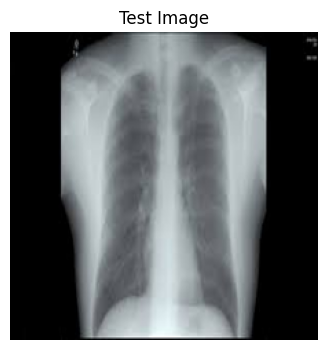

Final shape: (1, 224, 224, 3)


In [52]:
# Load a dog image
# https://images.pexels.com/photos/672244/pexels-photo-672244.jpeg
# Check the filters

# After you run the remaining cells, come back here and restart as follows:
# Load a Chest X-ray image
# Source and use an opensource Chest X-Ray image - not a random one

img_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSEFmHozNa3iT5IvWBCr8FSF7Oua5zsJ71s7Q&s"
response = requests.get(img_url)
img = Image.open(BytesIO(response.content)).convert('RGB')

# TODO: Step 1 — Resize to (224, 224)
img_resized = img.resize((224, 224))

# TODO: Step 2 — Convert to numpy array
img_array = np.array(img_resized)

# TODO: Step 3 — Add batch dimension → shape (1, 224, 224, 3)
img_batch = np.expand_dims(img_array, axis=0)

# TODO: Step 4 — Apply VGG16 preprocessing
img_preprocessed = preprocess_input(img_batch.copy())

# Show the image
plt.figure(figsize=(4, 4))
plt.imshow(img_resized)
plt.title("Test Image")
plt.axis('off')
plt.show()
print(f"Final shape: {img_preprocessed.shape}")

In [36]:
reveal_button(
    hint_text="<code>img.resize((224,224))</code> → <code>np.array()</code> → "
              "<code>np.expand_dims(..., axis=0)</code> → <code>preprocess_input()</code>",
    solution_code=(
        "img_resized     = img.resize((224, 224))\n"
        "img_array       = np.array(img_resized, dtype=np.float32)\n"
        "img_batch       = np.expand_dims(img_ar    ray, axis=0)\n"
        "img_preprocessed = preprocess_input(img_batch.copy())"
    )
)

Output()

---
## Task 5: Extract the Feature Maps

Run the preprocessed image through each sub-model to get the activations. We'll store them in a dictionary — then use the interactive explorer in Task 6.

### 💻 Your Turn

In [53]:
# TODO: For each extractor, run the image through it and store the result
all_feature_maps = {}

for name, extractor in feature_extractors.items():
    all_feature_maps[name] = extractor.predict(img_preprocessed, verbose=0)
    print(f"'{name}' → shape: {all_feature_maps[name].shape}")

'block1_conv1' → shape: (1, 224, 224, 64)
'block3_conv1' → shape: (1, 56, 56, 256)
'block5_conv1' → shape: (1, 14, 14, 512)


In [54]:
reveal_button(
    hint_text="Call <code>extractor.predict(img_preprocessed, verbose=0)</code> and store the result.",
    solution_code=(
        "all_feature_maps = {}\n"
        "for name, extractor in feature_extractors.items():\n"
        "    all_feature_maps[name] = extractor.predict(img_preprocessed, verbose=0)\n"
        "    fmap = all_feature_maps[name]\n"
        "    print(f\"'{name}' → shape: {fmap.shape}  (spatial: {fmap.shape[1]}x{fmap.shape[2]}, filters: {fmap.shape[3]})\")"
    )
)

Output()

---
## 🎚️ Task 6: Interactive Feature Map Explorer

Now for the fun part. Use the controls below to explore **any filter, at any layer, with any colormap**.

**Things to try:**
- Start at `block1_conv1`, scroll through filters 0–10. Do they look like edges?
- Switch to `block5_conv3`. Do most filters look **dark** (inactive)? Why?
- Try the `gray` colormap — does it feel different from `viridis`?
- Find the filter with the **highest mean activation** at each layer (it's highlighted in the stats panel)

In [55]:
# ── Interactive Feature Map Explorer ──────────────────────────────────────────
# Make sure all_feature_maps is populated (run Task 5 first!)

# Build controls
layer_select = widgets.Dropdown(
    options=layer_names,
    value=layer_names[0],
    description='Layer:',
    style={'description_width': '60px'},
    layout=widgets.Layout(width='280px')
)

filter_slider = widgets.IntSlider(
    min=0, max=63, step=1, value=0,
    description='Filter #:',
    style={'description_width': '70px'},
    layout=widgets.Layout(width='380px'),
    continuous_update=False
)

cmap_select = widgets.Dropdown(
    options=['viridis', 'plasma', 'inferno', 'magma', 'gray', 'hot', 'RdBu_r'],
    value='viridis',
    description='Colormap:',
    style={'description_width': '80px'},
    layout=widgets.Layout(width='220px')
)

stats_out = widgets.Output()
plot_out  = widgets.Output()

def update_explorer(change=None):
    layer_name  = layer_select.value
    filter_idx  = filter_slider.value
    cmap        = cmap_select.value

    if layer_name not in all_feature_maps:
        with plot_out:
            plot_out.clear_output()
            print("⚠️  Run Task 5 first to compute feature maps!")
        return

    fmaps = all_feature_maps[layer_name]   # shape: (1, H, W, num_filters)
    num_filters = fmaps.shape[-1]

    # Update slider max to match this layer's filter count
    filter_slider.max = num_filters - 1
    filter_idx = min(filter_idx, num_filters - 1)

    activation = fmaps[0, :, :, filter_idx]   # (H, W)

    # ── Stats panel ──────────────────────────────────────────────────────────
    mean_per_filter = fmaps[0].mean(axis=(0, 1))
    top_filter      = int(np.argmax(mean_per_filter))
    pct_active      = float(np.mean(activation > 0)) * 100

    with stats_out:
        stats_out.clear_output(wait=True)
        display(HTML(
            f'<div style="background:#f0f4ff;padding:10px;border-radius:6px;'
            f'font-family:monospace;font-size:13px;line-height:1.7">'
            f'<b>Layer:</b>  {layer_name}<br>'
            f'<b>Spatial:</b> {fmaps.shape[1]}×{fmaps.shape[2]} px<br>'
            f'<b>Filters:</b> {num_filters} total<br>'
            f'<hr style="margin:5px 0">'
            f'<b>Selected filter {filter_idx}:</b><br>'
            f'&nbsp; Min: {activation.min():.3f}<br>'
            f'&nbsp; Max: {activation.max():.3f}<br>'
            f'&nbsp; Mean: {activation.mean():.3f}<br>'
            f'&nbsp; % Active: {pct_active:.1f}%<br>'
            f'<hr style="margin:5px 0">'
            f'<b>🏆 Most active filter:</b> #{top_filter} '
            f'(mean={mean_per_filter[top_filter]:.3f})'
            f'</div>'
        ))

    # ── Plot ─────────────────────────────────────────────────────────────────
    with plot_out:
        plot_out.clear_output(wait=True)
        fig, axes = plt.subplots(1, 3, figsize=(14, 4.5))

        # Left: original image
        axes[0].imshow(img_resized)
        axes[0].set_title('Original Image', fontsize=12)
        axes[0].axis('off')

        # Middle: selected filter
        im = axes[1].imshow(activation, cmap=cmap)
        axes[1].set_title(
            f'{layer_name}\nFilter #{filter_idx} | mean={activation.mean():.3f}',
            fontsize=11
        )
        axes[1].axis('off')
        plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

        # Right: top activated filter
        top_activation = fmaps[0, :, :, top_filter]
        im2 = axes[2].imshow(top_activation, cmap=cmap)
        axes[2].set_title(
            f'🏆 Most Active Filter #{top_filter}\nmean={mean_per_filter[top_filter]:.3f}',
            fontsize=11
        )
        axes[2].axis('off')
        plt.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)

        plt.suptitle(f'Feature Map Explorer — {layer_name}', fontsize=13, fontweight='bold')
        plt.tight_layout()
        plt.show()

# Wire up observers
layer_select.observe(update_explorer, names='value')
filter_slider.observe(update_explorer, names='value')
cmap_select.observe(update_explorer, names='value')

# Layout
controls = widgets.VBox([
    widgets.HTML('<b>🎚️ Controls:</b>'),
    widgets.HBox([layer_select, cmap_select]),
    filter_slider,
])
main_panel = widgets.HBox([
    widgets.VBox([controls, stats_out], layout=widgets.Layout(width='310px')),
    plot_out
])
display(main_panel)
update_explorer()  # initial render

---
## Task 7: Save the 4×4 Grid Visualizations

For submission, generate and save a **4×4 grid** (first 16 filters) for each of the 3 layers.

### 💻 Your Turn

In [56]:
import os
import matplotlib.pyplot as plt
from google.colab import files
import zipfile

# --------------------------------------------------
# Create a folder inside Colab VM
# --------------------------------------------------
save_dir = "/content/feature_maps"
os.makedirs(save_dir, exist_ok=True)

# --------------------------------------------------
# Function to Save Feature Map Grid
# --------------------------------------------------
def save_grid(layer_name, cmap='viridis'):
    """Display and save a 4x4 grid of the first 16 filters for a layer."""
    
    fmaps = all_feature_maps[layer_name]   # shape: (1, H, W, num_filters)
    
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    fig.suptitle(
        f'Feature Maps — {layer_name}\n'
        f'Spatial: {fmaps.shape[1]}×{fmaps.shape[2]} | Filters shown: 16 of {fmaps.shape[3]}',
        fontsize=13, fontweight='bold'
    )

    for i, ax in enumerate(axes.flat):
        if i < fmaps.shape[3]:
            activation = fmaps[0, :, :, i]
            ax.imshow(activation, cmap=cmap)
            mean_val = activation.mean()
            ax.set_title(f'Filter {i}  μ={mean_val:.2f}', fontsize=8)
        else:
            ax.axis('off')
        ax.axis('off')

    plt.tight_layout()

    filename = os.path.join(save_dir, f"feature_maps_{layer_name}.png")
    plt.savefig(filename, dpi=100, bbox_inches='tight')
    plt.close()

    print(f"✅ Saved in Colab VM: {filename}")

# --------------------------------------------------
# Save all layers
# --------------------------------------------------
for name in layer_names:
    save_grid(name)

# --------------------------------------------------
# Zip all saved images
# --------------------------------------------------
zip_path = "/content/feature_maps.zip"

with zipfile.ZipFile(zip_path, 'w') as zipf:
    for file in os.listdir(save_dir):
        zipf.write(os.path.join(save_dir, file), file)

print("📦 Zipped all feature maps!")

# --------------------------------------------------
# Download once to local system
# --------------------------------------------------
files.download(zip_path)

✅ Saved in Colab VM: /content/feature_maps/feature_maps_block1_conv1.png
✅ Saved in Colab VM: /content/feature_maps/feature_maps_block3_conv1.png
✅ Saved in Colab VM: /content/feature_maps/feature_maps_block5_conv1.png
📦 Zipped all feature maps!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import shutil

shutil.copy(
    '/content/feature_maps.zip',
    '/content/drive/MyDrive/feature_maps.zip'
)

print("✅ Copied to Google Drive")

✅ Copied to Google Drive


In [41]:
reveal_button(
    hint_text="Inside the loop: <code>activation = fmaps[0, :, :, i]</code> then <code>ax.imshow(activation, cmap=cmap)</code>",
    solution_code=(
        "# Inside save_grid():\n"
        "activation = fmaps[0, :, :, i]\n"
        "ax.imshow(activation, cmap=cmap)\n\n"
        "# Then call for all layers:\n"
        "for name in layer_names:\n"
        "    save_grid(name)"
    )
)

Output()

---
## ✍️ Reflection

You've now *seen* what each layer detects. Write **3 sentences** below — one per layer — describing your observations.

Guiding questions:
- Do early activations look similar to the original image, or very different?
- In deep layers, why are most filters **all dark** (zero activation)?
- How does this visualization help **doctors trust** an X-ray classifier?

In [42]:
# ✏️ Your reflection (as Python comments is fine)

# block1_conv1 (Early):
# - Shows basic edge and color detectors

# block3_conv3 (Middle):
# - Shows combinations of shapes and textures

# block5_conv3 (Deep):
# - Shows high-level features like object parts or whole objects

# How this builds trust in the hospital scenario:
# - By understanding what the model is looking at in each layer, we can verify that it's focusing on relevant features (like lung textures) rather than irrelevant ones (like image corners or text).
# - If the model's deep layers are activating strongly for known disease patterns, that increases our confidence that it's learning meaningful representations rather than just memorizing the training data.

---
## 📤 Submission Checklist

Before submitting this notebook:

- [ ] All code cells are **run** with outputs visible
- [ ] `feature_maps_block1_conv1.png` saved
- [ ] `feature_maps_block3_conv3.png` saved
- [ ] `feature_maps_block5_conv3.png` saved
- [ ] Reflection section filled in with 3 sentences
- [ ] Share this `.ipynb` (File → Download or Share via Colab link)
